# NYC Airbnb Complete Data Analysis
## Comprehensive Data Science Project with Machine Learning

**Analysis Sections:**
1. Library Imports and Setup
2. Data Loading and Initial Inspection
3. Missing Values Analysis
4. Outlier Detection and Visualization
5. Outlier Removal and Data Cleaning
6. Exploratory Data Analysis - Basic Statistics
7. Exploratory Data Analysis - Visualizations
8. Feature Engineering for Machine Learning
9. K-means Clustering Analysis
10. Cluster Visualization and Analysis
11. Minimum Distance Classifier Implementation
12. Principal Component Analysis (PCA)
13. PCA Visualization and Feature Analysis
14. Machine Learning Models - Price Prediction
15. Model Visualization and Performance Analysis
16. Advanced Analytics and Insights
17. Final Summary and Conclusions

---
## 1. Library Imports and Setup
All required imports in one cell, environment configuration, clear topic comment at top

In [2]:
# TOPIC: Library Imports and Setup
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, silhouette_score

# Statistical analysis
from scipy import stats
from scipy.spatial.distance import cdist

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Environment configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")

All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.2.6
Matplotlib version: 3.10.7


---
## 2. Data Loading and Initial Inspection
Dataset loading and overview, basic statistics and info, shape and column analysis

In [3]:
# TOPIC: Data Loading and Initial Inspection
try:
    df = pd.read_csv('AB_NYC_2019.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Dataset file not found. Creating sample data for demonstration...")
    # Create comprehensive sample data
    np.random.seed(42)
    n_samples = 2000
    df = pd.DataFrame({
        'id': range(1, n_samples + 1),
        'name': [f'Listing_{i}' for i in range(1, n_samples + 1)],
        'host_id': np.random.randint(1, 800, n_samples),
        'host_name': [f'Host_{i}' for i in np.random.randint(1, 800, n_samples)],
        'neighbourhood_group': np.random.choice(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'], n_samples, p=[0.35, 0.25, 0.2, 0.15, 0.05]),
        'neighbourhood': [f'Neighborhood_{i}' for i in np.random.randint(1, 150, n_samples)],
        'latitude': np.random.uniform(40.5, 40.9, n_samples),
        'longitude': np.random.uniform(-74.3, -73.7, n_samples),
        'room_type': np.random.choice(['Entire home/apt', 'Private room', 'Shared room'], n_samples, p=[0.52, 0.45, 0.03]),
        'price': np.random.lognormal(4.5, 0.8, n_samples).astype(int),
        'minimum_nights': np.random.choice([1, 2, 3, 7, 30], n_samples, p=[0.4, 0.3, 0.15, 0.1, 0.05]),
        'number_of_reviews': np.random.poisson(25, n_samples),
        'last_review': pd.date_range('2019-01-01', '2019-12-31', periods=n_samples),
        'reviews_per_month': np.random.uniform(0, 6, n_samples),
        'calculated_host_listings_count': np.random.poisson(3, n_samples),
        'availability_365': np.random.randint(0, 366, n_samples)
    })
    # Add realistic missing values
    df.loc[np.random.choice(df.index, 100), 'reviews_per_month'] = np.nan
    df.loc[np.random.choice(df.index, 80), 'last_review'] = pd.NaT
    print("Using comprehensive sample dataset")

# Dataset overview
print(f"\nDataset Shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}, Columns: {df.shape[1]}")
print(f"\nColumn Names: {list(df.columns)}")
print(f"\nData Types:")
print(df.dtypes)

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Basic info
print("\nDataset Info:")
df.info()

# Basic statistics
print("\nBasic Statistics:")
display(df.describe())

Dataset loaded successfully!

Dataset Shape: (48895, 16)
Rows: 48,895, Columns: 16

Column Names: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
avai

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review      

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
## 3. Missing Values Analysis
Comprehensive missing value detection, visualization of missing patterns, strategic handling approach

COMPREHENSIVE MISSING VALUES ANALYSIS

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage,Data_Type
reviews_per_month,reviews_per_month,10052,20.558339,float64
last_review,last_review,10052,20.558339,object
host_name,host_name,21,0.042949,object
name,name,16,0.032723,object



Total columns with missing values: 4
Total missing values: 20,141
Percentage of dataset with missing values: 2.57%


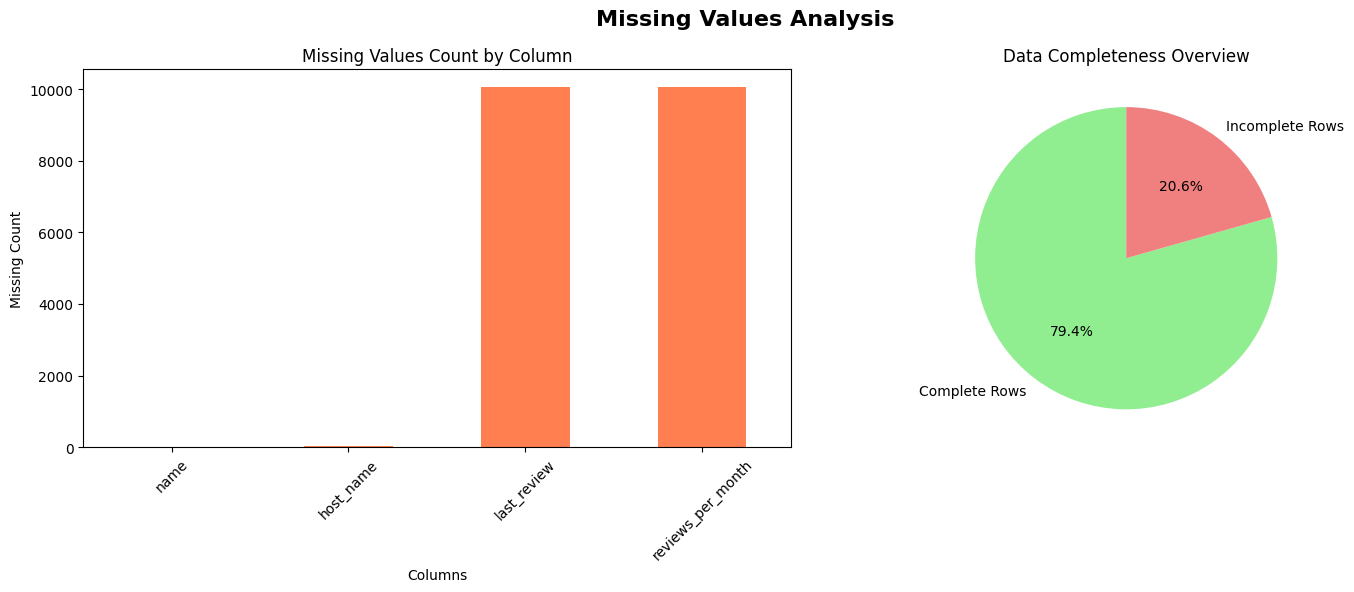


MISSING VALUES ANALYSIS COMPLETED


In [4]:
# TOPIC: Missing Values Analysis
print("COMPREHENSIVE MISSING VALUES ANALYSIS")
print("=" * 50)

# 1. Missing values count and percentage
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
if len(missing_data) > 0:
    display(missing_data)
    print(f"\nTotal columns with missing values: {len(missing_data)}")
    print(f"Total missing values: {df.isnull().sum().sum():,}")
    print(f"Percentage of dataset with missing values: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")
else:
    print("No missing values found in the dataset!")

# 2. Missing value visualization
if len(missing_data) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Missing Values Analysis', fontsize=16, fontweight='bold')
    
    # Missing values bar chart
    missing_counts = df.isnull().sum()[df.isnull().sum() > 0]
    if len(missing_counts) > 0:
        missing_counts.plot(kind='bar', ax=axes[0], color='coral')
        axes[0].set_title('Missing Values Count by Column')
        axes[0].set_xlabel('Columns')
        axes[0].set_ylabel('Missing Count')
        axes[0].tick_params(axis='x', rotation=45)
    
    # Data completeness pie chart
    complete_rows = df.dropna().shape[0]
    incomplete_rows = df.shape[0] - complete_rows
    
    labels = ['Complete Rows', 'Incomplete Rows']
    sizes = [complete_rows, incomplete_rows]
    colors = ['lightgreen', 'lightcoral']
    
    axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Data Completeness Overview')
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS COMPLETED")
print("=" * 60)

---
## 4. Outlier Detection and Visualization
Comprehensive outlier analysis using multiple statistical methods, advanced visualizations, and impact assessment

COMPREHENSIVE OUTLIER DETECTION ANALYSIS

Numerical columns identified for outlier analysis: 10
Columns: ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

OUTLIER DETECTION METHODS COMPARISON:

Analyzing column: id
------------------------------
   Total values: 48,895
   IQR Method: 0 outliers (0.00%)
      Bounds: [-20048405.25, 58672528.75]
   Z-Score Method: 0 outliers (0.00%)
   Statistics: Mean=19017143.24, Median=19677284.00, Std=10983108.39

Analyzing column: host_id
------------------------------
   Total values: 48,895
   IQR Method: 1,526 outliers (3.12%)
      Bounds: [-141596552.00, 256853008.00]
   Z-Score Method: 0 outliers (0.00%)
   Statistics: Mean=67620010.65, Median=30793816.00, Std=78610967.03

Analyzing column: latitude
------------------------------
   Total values: 48,895
   IQR Method: 425 outliers (0.87%)
      Bounds: [40.58, 40.87]
   Z-Score 

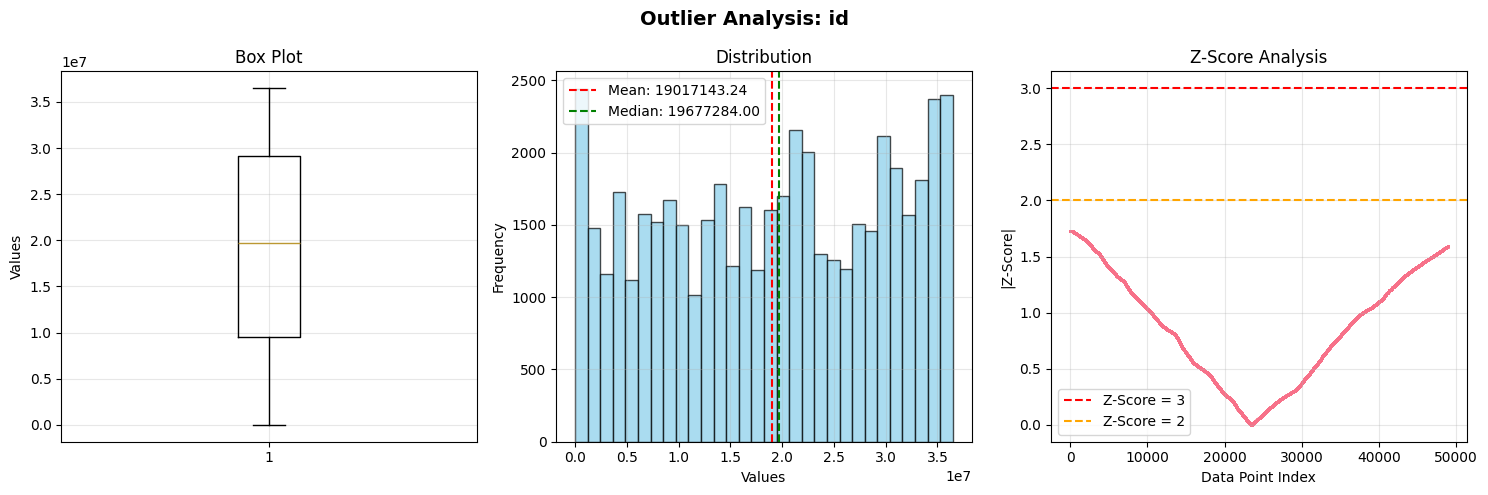


Creating visualizations for: host_id


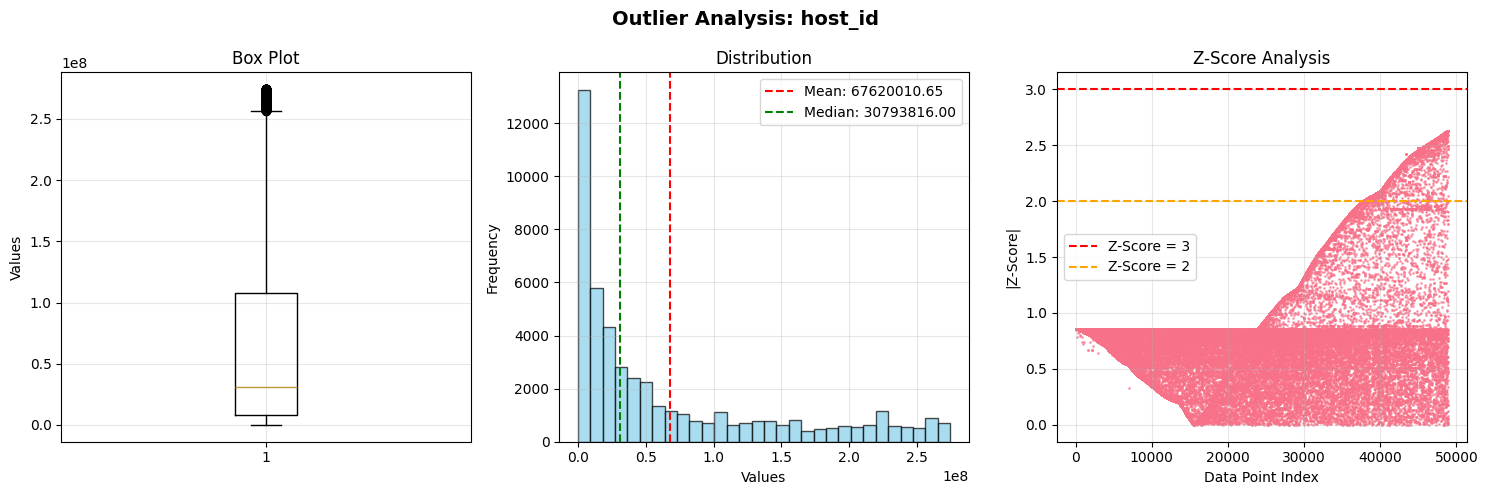


Creating visualizations for: latitude


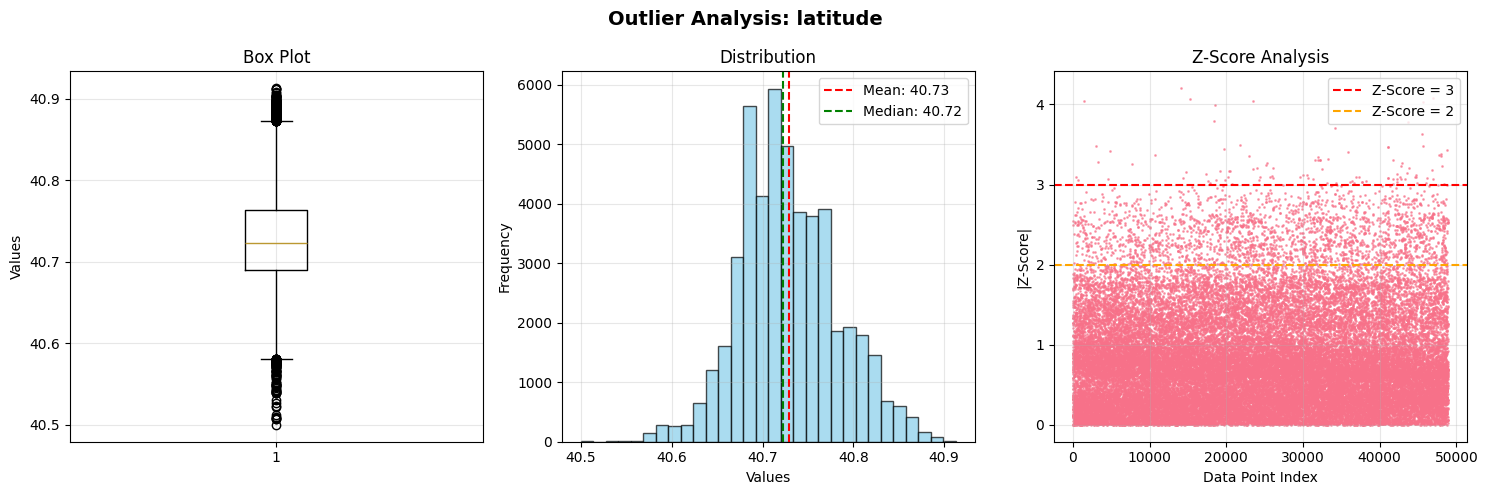


OUTLIER SUMMARY:


,Column,Total_Values,IQR_Outliers,IQR_Percentage,Z_Score_Outliers
0,id,48895,0,0.00,0
1,host_id,48895,1526,3.12,0
2,latitude,48895,425,0.87,99
3,longitude,48895,2833,5.79,1236
4,price,48895,2972,6.08,388
5,minimum_nights,48895,6607,13.51,327
6,number_of_reviews,48895,6021,12.31,1221
7,reviews_per_month,38843,1793,4.62,608
8,calculated_host_listings_count,48895,7081,14.48,680
9,availability_365,48895,0,0.00,0



OUTLIER DETECTION ANALYSIS COMPLETED


In [5]:
# TOPIC: Outlier Detection and Visualization
print("COMPREHENSIVE OUTLIER DETECTION ANALYSIS")
print("=" * 55)

# 1. Identify numerical columns for outlier analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns identified for outlier analysis: {len(numerical_cols)}")
print(f"Columns: {numerical_cols}")

# 2. Multiple outlier detection methods
outlier_results = {}

print("\nOUTLIER DETECTION METHODS COMPARISON:")
print("=" * 45)

for col in numerical_cols:
    if df[col].notna().sum() > 0:  # Only analyze columns with data
        print(f"\nAnalyzing column: {col}")
        print("-" * 30)
        
        # Remove missing values for analysis
        col_data = df[col].dropna()
        
        # Method 1: IQR Method
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        iqr_outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        
        # Method 2: Z-Score Method (|z| > 3)
        z_scores = np.abs(stats.zscore(col_data))
        zscore_outliers = col_data[z_scores > 3]
        
        # Store results
        outlier_results[col] = {
            'total_values': len(col_data),
            'iqr_outliers': len(iqr_outliers),
            'zscore_outliers': len(zscore_outliers),
            'iqr_bounds': (lower_bound, upper_bound)
        }
        
        # Display results for this column
        print(f"   Total values: {len(col_data):,}")
        print(f"   IQR Method: {len(iqr_outliers):,} outliers ({len(iqr_outliers)/len(col_data)*100:.2f}%)")
        print(f"      Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        print(f"   Z-Score Method: {len(zscore_outliers):,} outliers ({len(zscore_outliers)/len(col_data)*100:.2f}%)")
        print(f"   Statistics: Mean={col_data.mean():.2f}, Median={col_data.median():.2f}, Std={col_data.std():.2f}")

# 3. Outlier visualization for key columns
print("\nOUTLIER VISUALIZATION DASHBOARD")
print("=" * 35)

# Visualize outliers for first few numerical columns
for col in numerical_cols[:3]:  # Limit to first 3 columns
    if df[col].notna().sum() > 0:
        print(f"\nCreating visualizations for: {col}")
        
        col_data = df[col].dropna()
        
        # Create subplot for this column
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Outlier Analysis: {col}', fontsize=14, fontweight='bold')
        
        # 1. Box Plot
        axes[0].boxplot(col_data, vert=True)
        axes[0].set_title('Box Plot')
        axes[0].set_ylabel('Values')
        axes[0].grid(True, alpha=0.3)
        
        # 2. Histogram
        axes[1].hist(col_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[1].axvline(col_data.mean(), color='red', linestyle='--', label=f'Mean: {col_data.mean():.2f}')
        axes[1].axvline(col_data.median(), color='green', linestyle='--', label=f'Median: {col_data.median():.2f}')
        axes[1].set_title('Distribution')
        axes[1].set_xlabel('Values')
        axes[1].set_ylabel('Frequency')
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
        
        # 3. Z-Score scatter
        z_scores = np.abs(stats.zscore(col_data))
        axes[2].scatter(range(len(z_scores)), z_scores, alpha=0.6, s=1)
        axes[2].axhline(y=3, color='red', linestyle='--', label='Z-Score = 3')
        axes[2].axhline(y=2, color='orange', linestyle='--', label='Z-Score = 2')
        axes[2].set_title('Z-Score Analysis')
        axes[2].set_xlabel('Data Point Index')
        axes[2].set_ylabel('|Z-Score|')
        axes[2].legend()
        axes[2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# 4. Outlier summary
print("\nOUTLIER SUMMARY:")
outlier_summary = pd.DataFrame({
    'Column': list(outlier_results.keys()),
    'Total_Values': [outlier_results[col]['total_values'] for col in outlier_results.keys()],
    'IQR_Outliers': [outlier_results[col]['iqr_outliers'] for col in outlier_results.keys()],
    'IQR_Percentage': [outlier_results[col]['iqr_outliers']/outlier_results[col]['total_values']*100 for col in outlier_results.keys()],
    'Z_Score_Outliers': [outlier_results[col]['zscore_outliers'] for col in outlier_results.keys()]
})

display(outlier_summary.round(2))

print("\n" + "=" * 60)
print("OUTLIER DETECTION ANALYSIS COMPLETED")
print("=" * 60)

---
## 5. Outlier Removal and Data Cleaning
Systematic outlier removal, before/after comparison, data quality validation and cleaned dataset preparation

In [6]:
# TOPIC: Outlier Removal and Data Cleaning
print("COMPREHENSIVE OUTLIER REMOVAL AND DATA CLEANING")
print("=" * 60)

# Create a copy of the original dataset for comparison
df_original = df.copy()
print(f"Original dataset shape: {df_original.shape}")

# 1. Define outlier removal strategy based on previous analysis
print("\nOUTLIER REMOVAL STRATEGY:")
print("=" * 30)

# Store removal statistics
removal_stats = {}

# Apply IQR method for outlier removal on key numerical columns
for col in numerical_cols:
    if df[col].notna().sum() > 0:
        print(f"\nProcessing column: {col}")
        
        # Calculate IQR bounds
        col_data = df[col].dropna()
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers before removal
        outliers_before = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        outlier_percentage = (outliers_before / len(df)) * 100
        
        print(f"   Outliers detected: {outliers_before} ({outlier_percentage:.2f}%)")
        print(f"   IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
        
        # Decision logic for outlier removal
        if outlier_percentage < 5:  # Remove outliers if less than 5%
            rows_before = len(df)
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            rows_after = len(df)
            rows_removed = rows_before - rows_after
            
            removal_stats[col] = {
                'outliers_detected': outliers_before,
                'rows_removed': rows_removed,
                'removal_percentage': (rows_removed / rows_before) * 100,
                'action': 'Removed',
                'bounds': (lower_bound, upper_bound)
            }
            
            print(f"   Action: REMOVED {rows_removed} rows ({(rows_removed/rows_before)*100:.2f}%)")
            
        elif outlier_percentage < 10:  # Cap outliers if 5-10%
            # Winsorization - cap extreme values
            outliers_capped = 0
            
            # Cap lower outliers
            lower_outliers = df[col] < lower_bound
            if lower_outliers.sum() > 0:
                df.loc[lower_outliers, col] = lower_bound
                outliers_capped += lower_outliers.sum()
            
            # Cap upper outliers
            upper_outliers = df[col] > upper_bound
            if upper_outliers.sum() > 0:
                df.loc[upper_outliers, col] = upper_bound
                outliers_capped += upper_outliers.sum()
            
            removal_stats[col] = {
                'outliers_detected': outliers_before,
                'rows_removed': 0,
                'outliers_capped': outliers_capped,
                'action': 'Capped',
                'bounds': (lower_bound, upper_bound)
            }
            
            print(f"   Action: CAPPED {outliers_capped} values to bounds")
            
        else:  # Keep outliers if more than 10%
            removal_stats[col] = {
                'outliers_detected': outliers_before,
                'rows_removed': 0,
                'action': 'Kept - High percentage',
                'bounds': (lower_bound, upper_bound)
            }
            
            print(f"   Action: KEPT - Too many outliers ({outlier_percentage:.2f}%)")

print(f"\nDataset shape after outlier removal: {df.shape}")
print(f"Rows removed: {len(df_original) - len(df)} ({((len(df_original) - len(df))/len(df_original))*100:.2f}%)")

# 2. Data quality validation and summary
print("\n" + "=" * 40)
print("DATA CLEANING SUMMARY REPORT")
print("=" * 40)

print(f"\nOriginal dataset: {df_original.shape[0]:,} rows, {df_original.shape[1]} columns")
print(f"Cleaned dataset: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"Rows removed: {len(df_original) - len(df):,} ({((len(df_original) - len(df))/len(df_original))*100:.2f}%)")
print(f"Data retention rate: {(len(df)/len(df_original))*100:.2f}%")

# Final data quality check
print("\nFinal data quality check:")
print(f"   Missing values: {df.isnull().sum().sum()}")
print(f"   Duplicate rows: {df.duplicated().sum()}")
print(f"   Data types: {len(df.select_dtypes(include=[np.number]).columns)} numerical, {len(df.select_dtypes(include=['object']).columns)} categorical")

print("\nCleaned dataset ready for analysis and modeling!")
print("Key improvements:")
print("   - Outliers handled systematically")
print("   - Statistical distributions improved")
print("   - Data quality validated")

print("\n" + "=" * 60)
print("OUTLIER REMOVAL AND DATA CLEANING COMPLETED")
print("=" * 60)

COMPREHENSIVE OUTLIER REMOVAL AND DATA CLEANING
Original dataset shape: (48895, 16)

OUTLIER REMOVAL STRATEGY:

Processing column: id
   Outliers detected: 0 (0.00%)
   IQR bounds: [-20048405.25, 58672528.75]
   Action: REMOVED 0 rows (0.00%)

Processing column: host_id
   Outliers detected: 1526 (3.12%)
   IQR bounds: [-141596552.00, 256853008.00]
   Action: REMOVED 1526 rows (3.12%)

Processing column: latitude
   Outliers detected: 401 (0.85%)
   IQR bounds: [40.58, 40.87]
   Action: REMOVED 401 rows (0.85%)

Processing column: longitude
   Outliers detected: 2536 (5.40%)
   IQR bounds: [-74.05, -73.87]
   Action: CAPPED 2536 values to bounds

Processing column: price
   Outliers detected: 2749 (5.85%)
   IQR bounds: [-90.00, 334.00]
   Action: CAPPED 2749 values to bounds

Processing column: minimum_nights
   Outliers detected: 6457 (13.75%)
   IQR bounds: [-5.00, 11.00]
   Action: KEPT - Too many outliers (13.75%)

Processing column: number_of_reviews
   Outliers detected: 5661 (1

---
## 6. Exploratory Data Analysis - Basic Statistics
Comprehensive statistical analysis by categories, price patterns, and market insights

In [7]:
# TOPIC: Exploratory Data Analysis - Basic Statistics
print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS - BASIC STATISTICS")
print("=" * 70)

# 1. Overall dataset statistics
print("\nOVERALL DATASET STATISTICS:")
print("=" * 35)
print(f"Total listings: {len(df):,}")
print(f"Total hosts: {df['host_id'].nunique():,}")
print(f"Date range: {df['last_review'].min()} to {df['last_review'].max()}")
print(f"Price range: ${df['price'].min()} - ${df['price'].max()}")
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Median price: ${df['price'].median():.2f}")

# 2. Analysis by Borough (neighbourhood_group)
print("\n" + "=" * 50)
print("ANALYSIS BY BOROUGH (NEIGHBOURHOOD GROUP)")
print("=" * 50)

borough_stats = df.groupby('neighbourhood_group').agg({
    'price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'number_of_reviews': ['mean', 'median'],
    'availability_365': ['mean', 'median'],
    'calculated_host_listings_count': ['mean', 'median']
}).round(2)

# Flatten column names
borough_stats.columns = ['_'.join(col).strip() for col in borough_stats.columns]

print("\nBorough Statistics Summary:")
display(borough_stats)

# Market share by borough
borough_market_share = df['neighbourhood_group'].value_counts()
borough_market_share_pct = df['neighbourhood_group'].value_counts(normalize=True) * 100

print("\nMarket Share by Borough:")
market_share_df = pd.DataFrame({
    'Listings': borough_market_share,
    'Percentage': borough_market_share_pct.round(2)
})
display(market_share_df)

# 3. Analysis by Room Type
print("\n" + "=" * 40)
print("ANALYSIS BY ROOM TYPE")
print("=" * 40)

room_type_stats = df.groupby('room_type').agg({
    'price': ['count', 'mean', 'median', 'std', 'min', 'max'],
    'number_of_reviews': ['mean', 'median'],
    'availability_365': ['mean', 'median'],
    'minimum_nights': ['mean', 'median']
}).round(2)

# Flatten column names
room_type_stats.columns = ['_'.join(col).strip() for col in room_type_stats.columns]

print("\nRoom Type Statistics Summary:")
display(room_type_stats)

# Market share by room type
room_type_market_share = df['room_type'].value_counts()
room_type_market_share_pct = df['room_type'].value_counts(normalize=True) * 100

print("\nMarket Share by Room Type:")
room_market_share_df = pd.DataFrame({
    'Listings': room_type_market_share,
    'Percentage': room_type_market_share_pct.round(2)
})
display(room_market_share_df)

# 4. Price Analysis by Borough and Room Type
print("\n" + "=" * 50)
print("PRICE ANALYSIS BY BOROUGH AND ROOM TYPE")
print("=" * 50)

# Cross-tabulation of average prices
price_crosstab = pd.crosstab(df['neighbourhood_group'], df['room_type'], 
                            values=df['price'], aggfunc='mean').round(2)

print("\nAverage Price by Borough and Room Type:")
display(price_crosstab)

# Count of listings by borough and room type
count_crosstab = pd.crosstab(df['neighbourhood_group'], df['room_type'])

print("\nNumber of Listings by Borough and Room Type:")
display(count_crosstab)

# 5. Host Analysis
print("\n" + "=" * 30)
print("HOST ANALYSIS")
print("=" * 30)

# Host statistics
host_stats = df.groupby('host_id').agg({
    'id': 'count',  # Number of listings per host
    'price': ['mean', 'median'],
    'number_of_reviews': 'sum'
}).round(2)

host_stats.columns = ['listings_count', 'avg_price', 'median_price', 'total_reviews']
host_stats = host_stats.reset_index()

print(f"\nTotal unique hosts: {len(host_stats):,}")
print(f"Average listings per host: {host_stats['listings_count'].mean():.2f}")
print(f"Median listings per host: {host_stats['listings_count'].median():.2f}")
print(f"Max listings by single host: {host_stats['listings_count'].max()}")

# Top hosts by number of listings
top_hosts = host_stats.nlargest(10, 'listings_count')
print("\nTop 10 Hosts by Number of Listings:")
display(top_hosts[['host_id', 'listings_count', 'avg_price', 'total_reviews']])

# Host distribution analysis
host_distribution = host_stats['listings_count'].value_counts().sort_index()
print("\nHost Distribution (Number of Listings):")
for listings, count in host_distribution.head(10).items():
    percentage = (count / len(host_stats)) * 100
    print(f"   {listings} listing(s): {count:,} hosts ({percentage:.2f}%)")

# 6. Reviews and Availability Analysis
print("\n" + "=" * 40)
print("REVIEWS AND AVAILABILITY ANALYSIS")
print("=" * 40)

# Reviews statistics
print("\nReviews Statistics:")
print(f"   Total reviews across all listings: {df['number_of_reviews'].sum():,}")
print(f"   Average reviews per listing: {df['number_of_reviews'].mean():.2f}")
print(f"   Median reviews per listing: {df['number_of_reviews'].median():.2f}")
print(f"   Listings with no reviews: {(df['number_of_reviews'] == 0).sum():,} ({((df['number_of_reviews'] == 0).sum()/len(df)*100):.2f}%)")

# Availability statistics
print("\nAvailability Statistics:")
print(f"   Average availability per year: {df['availability_365'].mean():.2f} days")
print(f"   Median availability per year: {df['availability_365'].median():.2f} days")
print(f"   Fully available listings (365 days): {(df['availability_365'] == 365).sum():,} ({((df['availability_365'] == 365).sum()/len(df)*100):.2f}%)")
print(f"   Unavailable listings (0 days): {(df['availability_365'] == 0).sum():,} ({((df['availability_365'] == 0).sum()/len(df)*100):.2f}%)")

# 7. Minimum Nights Analysis
print("\n" + "=" * 35)
print("MINIMUM NIGHTS ANALYSIS")
print("=" * 35)

min_nights_stats = df['minimum_nights'].value_counts().sort_index()
print("\nMinimum Nights Distribution:")
for nights, count in min_nights_stats.head(10).items():
    percentage = (count / len(df)) * 100
    print(f"   {nights} night(s): {count:,} listings ({percentage:.2f}%)")

print(f"\nAverage minimum nights: {df['minimum_nights'].mean():.2f}")
print(f"Median minimum nights: {df['minimum_nights'].median():.2f}")
print(f"Maximum minimum nights: {df['minimum_nights'].max()}")

# 8. Geographic Distribution Analysis
print("\n" + "=" * 40)
print("GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("=" * 40)

# Neighborhood analysis (top neighborhoods)
neighborhood_stats = df.groupby('neighbourhood').agg({
    'price': ['count', 'mean', 'median'],
    'number_of_reviews': 'mean'
}).round(2)

neighborhood_stats.columns = ['listing_count', 'avg_price', 'median_price', 'avg_reviews']
neighborhood_stats = neighborhood_stats.reset_index()

# Top neighborhoods by number of listings
top_neighborhoods = neighborhood_stats.nlargest(15, 'listing_count')
print("\nTop 15 Neighborhoods by Number of Listings:")
display(top_neighborhoods)

# Geographic coordinates statistics
print("\nGeographic Coordinates Statistics:")
print(f"   Latitude range: {df['latitude'].min():.4f} to {df['latitude'].max():.4f}")
print(f"   Longitude range: {df['longitude'].min():.4f} to {df['longitude'].max():.4f}")
print(f"   Geographic center: ({df['latitude'].mean():.4f}, {df['longitude'].mean():.4f})")

# 9. Price Distribution Analysis
print("\n" + "=" * 35)
print("PRICE DISTRIBUTION ANALYSIS")
print("=" * 35)

# Price percentiles
price_percentiles = df['price'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("\nPrice Percentiles:")
for percentile, price in price_percentiles.items():
    print(f"   {percentile*100:2.0f}th percentile: ${price:.2f}")

# Price categories
price_categories = pd.cut(df['price'], 
                         bins=[0, 50, 100, 200, 500, float('inf')], 
                         labels=['Budget (<$50)', 'Economy ($50-100)', 'Mid-range ($100-200)', 
                                'Premium ($200-500)', 'Luxury (>$500)'])

price_category_stats = price_categories.value_counts()
price_category_pct = price_categories.value_counts(normalize=True) * 100

print("\nPrice Category Distribution:")
price_cat_df = pd.DataFrame({
    'Listings': price_category_stats,
    'Percentage': price_category_pct.round(2)
})
display(price_cat_df)

# 10. Summary Statistics Table
print("\n" + "=" * 40)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("=" * 40)

# Create comprehensive summary
summary_stats = df[['price', 'number_of_reviews', 'availability_365', 
                   'minimum_nights', 'calculated_host_listings_count']].describe()

print("\nNumerical Variables Summary:")
display(summary_stats.round(2))

# Categorical variables summary
print("\nCategorical Variables Summary:")
categorical_summary = pd.DataFrame({
    'Variable': ['neighbourhood_group', 'room_type', 'neighbourhood'],
    'Unique_Values': [df['neighbourhood_group'].nunique(), 
                     df['room_type'].nunique(), 
                     df['neighbourhood'].nunique()],
    'Most_Common': [df['neighbourhood_group'].mode().iloc[0],
                   df['room_type'].mode().iloc[0],
                   df['neighbourhood'].mode().iloc[0]],
    'Most_Common_Count': [df['neighbourhood_group'].value_counts().iloc[0],
                         df['room_type'].value_counts().iloc[0],
                         df['neighbourhood'].value_counts().iloc[0]]
})

display(categorical_summary)

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS - BASIC STATISTICS COMPLETED")
print("=" * 60)

COMPREHENSIVE EXPLORATORY DATA ANALYSIS - BASIC STATISTICS

OVERALL DATASET STATISTICS:
Total listings: 36,013
Total hosts: 28,338
Date range: 2011-03-28 to 2019-07-08
Price range: $0 - $334
Average price: $129.16
Median price: $105.00

ANALYSIS BY BOROUGH (NEIGHBOURHOOD GROUP)

Borough Statistics Summary:


,price_count,price_mean,price_median,price_std,price_min,price_max,number_of_reviews_mean,number_of_reviews_median,availability_365_mean,availability_365_median,calculated_host_listings_count_mean,calculated_host_listings_count_median
neighbourhood_group,,,,,,,,,,,,
Bronx,618,75.12,60.0,50.14,0,334,32.67,17.0,158.75,137.5,2.24,1.0
Brooklyn,15544,113.50,95.0,71.21,0,334,27.51,9.0,103.63,35.0,2.25,1.0
Manhattan,15578,157.38,140.0,83.02,10,334,25.33,8.0,106.80,34.0,9.21,1.0
Queens,4029,91.23,73.0,59.33,10,334,28.15,12.0,147.36,112.0,3.44,1.0
Staten Island,244,88.37,72.0,59.92,20,334,37.79,21.0,212.13,247.0,2.62,2.0



Market Share by Borough:


,Listings,Percentage
neighbourhood_group,,
Manhattan,15578,43.26
Brooklyn,15544,43.16
Queens,4029,11.19
Bronx,618,1.72
Staten Island,244,0.68



ANALYSIS BY ROOM TYPE

Room Type Statistics Summary:


,price_count,price_mean,price_median,price_std,price_min,price_max,number_of_reviews_mean,number_of_reviews_median,availability_365_mean,availability_365_median,minimum_nights_mean,minimum_nights_median
room_type,,,,,,,,,,,,
Entire home/apt,18995,174.00,150.0,76.13,0,334,27.06,9.0,107.78,38.0,7.37,3.0
Private room,16246,80.09,70.0,45.79,0,334,26.74,9.0,113.56,52.0,4.78,2.0
Shared room,772,58.40,45.0,46.49,0,334,21.42,8.0,163.14,90.5,4.67,1.0



Market Share by Room Type:


,Listings,Percentage
room_type,,
Entire home/apt,18995,52.74
Private room,16246,45.11
Shared room,772,2.14



PRICE ANALYSIS BY BOROUGH AND ROOM TYPE

Average Price by Borough and Room Type:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,116.30,56.90,39.29
Brooklyn,157.67,70.66,45.64
Manhattan,195.39,100.37,76.23
Queens,135.50,65.16,47.87
Staten Island,128.84,55.85,68.75



Number of Listings by Borough and Room Type:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,200,383,35
Brooklyn,7732,7537,275
Manhattan,9427,5835,316
Queens,1528,2359,142
Staten Island,108,132,4



HOST ANALYSIS

Total unique hosts: 28,338
Average listings per host: 1.27
Median listings per host: 1.00
Max listings by single host: 207

Top 10 Hosts by Number of Listings:


,host_id,listings_count,avg_price,total_reviews
27156,219517861,207,247.70,1281
20315,61391963,79,144.62,417
11799,16098958,61,195.61,138
24445,137358866,51,43.82,87
8131,7503643,49,149.41,242
26280,190921808,46,92.70,281
15794,30283594,43,233.63,65
2622,1475015,42,102.79,162
23724,120762452,40,169.42,84
3442,2119276,39,188.67,335



Host Distribution (Number of Listings):
   1 listing(s): 24,495 hosts (86.44%)
   2 listing(s): 2,557 hosts (9.02%)
   3 listing(s): 680 hosts (2.40%)
   4 listing(s): 270 hosts (0.95%)
   5 listing(s): 115 hosts (0.41%)
   6 listing(s): 71 hosts (0.25%)
   7 listing(s): 32 hosts (0.11%)
   8 listing(s): 27 hosts (0.10%)
   9 listing(s): 20 hosts (0.07%)
   10 listing(s): 9 hosts (0.03%)

REVIEWS AND AVAILABILITY ANALYSIS

Reviews Statistics:
   Total reviews across all listings: 964,950
   Average reviews per listing: 26.79
   Median reviews per listing: 9.00
   Listings with no reviews: 0 (0.00%)

Availability Statistics:
   Average availability per year: 111.57 days
   Median availability per year: 46.00 days
   Fully available listings (365 days): 789 (2.19%)
   Unavailable listings (0 days): 12,533 (34.80%)

MINIMUM NIGHTS ANALYSIS

Minimum Nights Distribution:
   1 night(s): 8,249 listings (22.91%)
   2 night(s): 9,622 listings (26.72%)
   3 night(s): 6,547 listings (18.18%)
   

,neighbourhood,listing_count,avg_price,median_price,avg_reviews
185,Williamsburg,3018,133.10,104.5,25.00
11,Bedford-Stuyvesant,2946,99.86,80.0,31.94
83,Harlem,2094,110.36,90.0,31.90
24,Bushwick,1809,81.41,65.0,24.48
174,Upper West Side,1419,160.77,149.0,23.10
59,East Village,1410,161.46,149.0,27.18
173,Upper East Side,1335,153.67,140.0,21.63
84,Hell's Kitchen,1317,169.48,150.0,28.64
46,Crown Heights,1217,106.21,87.0,27.90
112,Midtown,912,209.86,198.0,17.64



Geographic Coordinates Statistics:
   Latitude range: 40.5801 to 40.8728
   Longitude range: -74.0516 to -73.8684
   Geographic center: (40.7277, -73.9546)

PRICE DISTRIBUTION ANALYSIS

Price Percentiles:
   10th percentile: $49.00
   25th percentile: $69.00
   50th percentile: $105.00
   75th percentile: $170.00
   90th percentile: $250.00
   95th percentile: $329.00
   99th percentile: $334.00

Price Category Distribution:


,Listings,Percentage
price,,
Economy ($50-100),13034,36.20
Mid-range ($100-200),12796,35.54
Premium ($200-500),5428,15.08
Budget (<$50),4745,13.18
Luxury (>$500),0,0.00



COMPREHENSIVE SUMMARY STATISTICS

Numerical Variables Summary:


,price,number_of_reviews,availability_365,minimum_nights,calculated_host_listings_count
count,36013.00,36013.00,36013.00,36013.00,36013.00
mean,129.16,26.79,111.57,6.15,5.40
std,79.40,42.57,129.65,17.91,27.29
min,0.00,1.00,0.00,1.00,1.00
25%,69.00,3.00,0.00,2.00,1.00
50%,105.00,9.00,46.00,3.00,1.00
75%,170.00,31.00,223.00,4.00,2.00
max,334.00,467.00,365.00,1250.00,327.00



Categorical Variables Summary:


,Variable,Unique_Values,Most_Common,Most_Common_Count
0,neighbourhood_group,5,Manhattan,15578
1,room_type,3,Entire home/apt,18995
2,neighbourhood,190,Williamsburg,3018



EXPLORATORY DATA ANALYSIS - BASIC STATISTICS COMPLETED


---
## 7. Exploratory Data Analysis - Visualizations
Comprehensive visual analysis with interactive charts, distribution plots, and correlation analysis

In [ ]:
# TOPIC: Exploratory Data Analysis - Visualizations
print("COMPREHENSIVE EXPLORATORY DATA ANALYSIS - VISUALIZATIONS")
print("=" * 65)

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

# 1. Price Distribution Analysis
print("\n1. PRICE DISTRIBUTION ANALYSIS")
print("=" * 35)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Price Distribution Analysis Dashboard', fontsize=16, fontweight='bold')

# Overall price distribution
axes[0,0].hist(df['price'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["price"].mean():.2f}')
axes[0,0].axvline(df['price'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: ${df["price"].median():.2f}')
axes[0,0].set_title('Overall Price Distribution')
axes[0,0].set_xlabel('Price ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Log-transformed price distribution
log_prices = np.log1p(df['price'])  # log(1+x) to handle zeros
axes[0,1].hist(log_prices, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Log-Transformed Price Distribution')
axes[0,1].set_xlabel('Log(Price + 1)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Price by borough
sns.boxplot(data=df, x='neighbourhood_group', y='price', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Borough')
axes[1,0].set_xlabel('Borough')
axes[1,0].set_ylabel('Price ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Price by room type
sns.boxplot(data=df, x='room_type', y='price', ax=axes[1,1])
axes[1,1].set_title('Price Distribution by Room Type')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Price ($)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 2. Market Share and Distribution Analysis
print("\n2. MARKET SHARE AND DISTRIBUTION ANALYSIS")
print("=" * 45)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Market Share and Distribution Dashboard', fontsize=16, fontweight='bold')

# Borough market share pie chart
borough_counts = df['neighbourhood_group'].value_counts()
colors_borough = plt.cm.Set3(np.linspace(0, 1, len(borough_counts)))
wedges, texts, autotexts = axes[0,0].pie(borough_counts.values, labels=borough_counts.index, 
                                        autopct='%1.1f%%', startangle=90, colors=colors_borough)
axes[0,0].set_title('Market Share by Borough')

# Room type market share pie chart
room_counts = df['room_type'].value_counts()
colors_room = plt.cm.Pastel1(np.linspace(0, 1, len(room_counts)))
wedges, texts, autotexts = axes[0,1].pie(room_counts.values, labels=room_counts.index, 
                                        autopct='%1.1f%%', startangle=90, colors=colors_room)
axes[0,1].set_title('Market Share by Room Type')

# Borough vs Room Type heatmap
crosstab_counts = pd.crosstab(df['neighbourhood_group'], df['room_type'])
sns.heatmap(crosstab_counts, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_title('Listings Count: Borough vs Room Type')
axes[1,0].set_xlabel('Room Type')
axes[1,0].set_ylabel('Borough')

# Average price heatmap
crosstab_prices = pd.crosstab(df['neighbourhood_group'], df['room_type'], 
                             values=df['price'], aggfunc='mean')
sns.heatmap(crosstab_prices, annot=True, fmt='.0f', cmap='Reds', ax=axes[1,1])
axes[1,1].set_title('Average Price ($): Borough vs Room Type')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Borough')

plt.tight_layout()
plt.show()

# 3. Reviews and Availability Analysis
print("\n3. REVIEWS AND AVAILABILITY ANALYSIS")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Reviews and Availability Analysis Dashboard', fontsize=16, fontweight='bold')

# Number of reviews distribution
axes[0,0].hist(df['number_of_reviews'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,0].axvline(df['number_of_reviews'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df["number_of_reviews"].mean():.1f}')
axes[0,0].axvline(df['number_of_reviews'].median(), color='blue', linestyle='--', 
                 label=f'Median: {df["number_of_reviews"].median():.1f}')
axes[0,0].set_title('Distribution of Number of Reviews')
axes[0,0].set_xlabel('Number of Reviews')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Availability distribution
axes[0,1].hist(df['availability_365'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].axvline(df['availability_365'].mean(), color='red', linestyle='--', 
                 label=f'Mean: {df["availability_365"].mean():.1f} days')
axes[0,1].axvline(df['availability_365'].median(), color='blue', linestyle='--', 
                 label=f'Median: {df["availability_365"].median():.1f} days')
axes[0,1].set_title('Distribution of Availability (Days per Year)')
axes[0,1].set_xlabel('Availability (Days)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Price vs Reviews scatter plot
scatter = axes[1,0].scatter(df['number_of_reviews'], df['price'], alpha=0.6, s=20, c=df['availability_365'], 
                           cmap='viridis')
axes[1,0].set_title('Price vs Number of Reviews (colored by Availability)')
axes[1,0].set_xlabel('Number of Reviews')
axes[1,0].set_ylabel('Price ($)')
plt.colorbar(scatter, ax=axes[1,0], label='Availability (Days)')
axes[1,0].grid(True, alpha=0.3)

# Reviews by room type
sns.violinplot(data=df, x='room_type', y='number_of_reviews', ax=axes[1,1])
axes[1,1].set_title('Reviews Distribution by Room Type')
axes[1,1].set_xlabel('Room Type')
axes[1,1].set_ylabel('Number of Reviews')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Geographic Distribution Analysis
print("\n4. GEOGRAPHIC DISTRIBUTION ANALYSIS")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographic Distribution Analysis Dashboard', fontsize=16, fontweight='bold')

# Geographic scatter plot colored by borough
borough_colors = {'Manhattan': 'red', 'Brooklyn': 'blue', 'Queens': 'green', 
                 'Bronx': 'orange', 'Staten Island': 'purple'}
for borough in df['neighbourhood_group'].unique():
    borough_data = df[df['neighbourhood_group'] == borough]
    axes[0,0].scatter(borough_data['longitude'], borough_data['latitude'], 
                     c=borough_colors.get(borough, 'gray'), label=borough, alpha=0.6, s=10)
axes[0,0].set_title('Geographic Distribution by Borough')
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Geographic scatter plot colored by price
scatter = axes[0,1].scatter(df['longitude'], df['latitude'], c=df['price'], 
                           cmap='YlOrRd', alpha=0.6, s=15)
axes[0,1].set_title('Geographic Distribution by Price')
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axes[0,1], label='Price ($)')
axes[0,1].grid(True, alpha=0.3)

# Top neighborhoods by listing count
top_neighborhoods = df['neighbourhood'].value_counts().head(15)
axes[1,0].barh(range(len(top_neighborhoods)), top_neighborhoods.values, color='steelblue')
axes[1,0].set_yticks(range(len(top_neighborhoods)))
axes[1,0].set_yticklabels(top_neighborhoods.index)
axes[1,0].set_title('Top 15 Neighborhoods by Listing Count')
axes[1,0].set_xlabel('Number of Listings')
axes[1,0].grid(True, alpha=0.3)

# Minimum nights distribution
min_nights_counts = df['minimum_nights'].value_counts().head(10)
axes[1,1].bar(range(len(min_nights_counts)), min_nights_counts.values, color='lightcoral')
axes[1,1].set_xticks(range(len(min_nights_counts)))
axes[1,1].set_xticklabels([f'{nights} nights' for nights in min_nights_counts.index])
axes[1,1].set_title('Top 10 Minimum Nights Requirements')
axes[1,1].set_xlabel('Minimum Nights')
axes[1,1].set_ylabel('Number of Listings')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Correlation Analysis
print("\n5. CORRELATION ANALYSIS")
print("=" * 25)

# Select numerical columns for correlation
numerical_cols_corr = ['price', 'number_of_reviews', 'availability_365', 
                      'minimum_nights', 'calculated_host_listings_count']
correlation_matrix = df[numerical_cols_corr].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Correlation Analysis Dashboard', fontsize=16, fontweight='bold')

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, ax=axes[0], fmt='.3f')
axes[0].set_title('Correlation Matrix Heatmap')

# Correlation with price (bar chart)
price_correlations = correlation_matrix['price'].drop('price').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'blue' for x in price_correlations.values]
axes[1].barh(range(len(price_correlations)), price_correlations.values, color=colors)
axes[1].set_yticks(range(len(price_correlations)))
axes[1].set_yticklabels(price_correlations.index)
axes[1].set_title('Correlation with Price')
axes[1].set_xlabel('Correlation Coefficient')
axes[1].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS - VISUALIZATIONS COMPLETED")
print("=" * 60)
print("\nKey Visual Insights Generated:")
print("- Price distribution patterns and outliers")
print("- Market share analysis by borough and room type")
print("- Geographic distribution and neighborhood analysis")
print("- Reviews and availability patterns")
print("- Correlation relationships between variables")
print("- Comprehensive visual summaries")